**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [ ]:
main_objectives ='''unticipate who is likely to leave, and what is causing them to leave. This might help keep the good emlployees
'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''I will perform EDA, try and find out the similarities and what is unique from this two tables. 
i would perfom feature selection and plot a box plot
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''it is known as a confusion metrix and it describes the complete performance of the model'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''I will treat the current employee table as a train set and input a new record to test and
the employee who left as the validation table because they have are truely gone.I will calulate the score afterwards 
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load 
from scipy.sparse import save_npz, load_npz 
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [43]:
tweets = pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\Twitter-Data-Analysis\data\cleaned.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,text
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth:🚨Africa is ""in the midst o...",0.000000,0.000000,en,548,612.0,ketuesriche,551,351,NaN,NaN,NaN,Mass,rt africa is in the midst of a full blown ...
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,NaN,NaN,"Edinburgh, Scotland",dr moeti is head of who in africa and one of ...
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,NaN,NaN,NaN,thank you 2note for creating this amazing cam...
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,1580,899.0,RIPNY08,2666,2704,NaN,NaN,NaN,NaN,former pfizer vp and virologist dr michael y...
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,72,20.0,pash22,28250,30819,NaN,NaN,NaN,United Kingdom,i think it s important that we don t sell cova...


In [45]:
#Form a new data frame (named cleanTweet), containing columns  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲 
clean_tweet= ["text","polarity"]
CleanTweets = tweets[clean_tweet]
CleanTweets.head()

,text,polarity
0,rt africa is in the midst of a full blown ...,0.000000
1,dr moeti is head of who in africa and one of ...,0.133333
2,thank you 2note for creating this amazing cam...,0.316667
3,former pfizer vp and virologist dr michael y...,0.166667
4,i think it s important that we don t sell cova...,0.300000


In [53]:
CleanTweets.dropna()

,text,polarity,score
0,rt africa is in the midst of a full blown ...,0.000000,neutral
1,dr moeti is head of who in africa and one of ...,0.133333,positive
2,thank you 2note for creating this amazing cam...,0.316667,positive
3,former pfizer vp and virologist dr michael y...,0.166667,positive
4,i think it s important that we don t sell cova...,0.300000,positive
...,...,...,...
6527,zweli please just release the graphic designer...,0.000000,neutral
6528,former pfizer vp and virologist dr michael y...,0.166667,positive
6529,73 respectfully veterinarians have to have...,0.281250,positive
6530,africa needs millions more doses here amp n...,0.166667,positive


In [54]:
#Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'
def text_category (p):
    if(p > 0):
        return "positive"
    elif(p < 0):
        return "negative"  
    elif(p==0):
        return "neutral"  


In [55]:
#Apply this function (text_category) on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet in 1 above to form a new column called  𝐬𝐜𝐨𝐫𝐞  in cleanTweet.
CleanTweets['score'] = CleanTweets['polarity'].apply(text_category)

<ipython-input-55-bfe35e6fcb4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanTweets['score'] = CleanTweets['polarity'].apply(text_category)


0     neutral
1    positive
2    positive
3    positive
4    positive
Name: score, dtype: object

<AxesSubplot:>

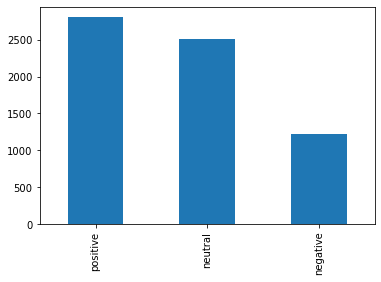

In [56]:
#Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchart
CleanTweets['score'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='score'>

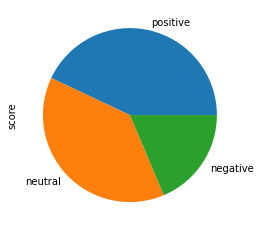

In [57]:
CleanTweets['score'].value_counts().plot(kind='pie')

In [58]:
#Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.
CleanTweets.drop(CleanTweets[CleanTweets.polarity == 0].index, inplace=True)

C:\Users\Jakinda\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
CleanTweets = CleanTweets.reset_index()
CleanTweets.head()

,level_0,index,text,polarity,score
0,0,1,dr moeti is head of who in africa and one of ...,0.133333,positive
1,1,2,thank you 2note for creating this amazing cam...,0.316667,positive
2,2,3,former pfizer vp and virologist dr michael y...,0.166667,positive
3,3,4,i think it s important that we don t sell cova...,0.300000,positive
4,4,5,i m pleased to welcome the wecandothis bus to...,0.644444,positive


In [67]:
#Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
CleanTweets['scoremap']=CleanTweets['score'].map({'positive':1, 'negative':0})
CleanTweets.head(100)

,level_0,index,text,polarity,score,scoremap
0,0,1,dr moeti is head of who in africa and one of ...,0.133333,positive,1
1,1,2,thank you 2note for creating this amazing cam...,0.316667,positive,1
2,2,3,former pfizer vp and virologist dr michael y...,0.166667,positive,1
3,3,4,i think it s important that we don t sell cova...,0.300000,positive,1
4,4,5,i m pleased to welcome the wecandothis bus to...,0.644444,positive,1
...,...,...,...,...,...,...
95,95,124,people over politics israel is delivering mor...,0.500000,positive,1
96,96,128,where the wet gyal in he pose gone,-0.100000,negative,0
97,97,129,dr moeti is head of who in africa and one of ...,0.133333,positive,1
98,98,130,hope please do your research before you spr...,-0.400000,negative,0


In [68]:
#Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.
X=CleanTweets['text']
y= CleanTweets['scoremap']

In [71]:
#Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
#Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
#trigram_vectorizer.fit(X_train.values)
# bigram_vectorizer = load('data_preprocessors/bigram_vectorizer.joblib')

In [92]:
X_train_trigram = trigram_vectorizer.fit_transform(X_train.values)
dump(trigram_vectorizer, 'data_preprocessors/bigram_vectorizer.joblib')
save_npz('vectorized_data/X_train_bigram.npz', X_train_trigram)

# X_train_bigram = load_npz('vectorized_data/X_train_bigram.npz')

In [93]:
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_train_trigram)

dump(trigram_tf_idf_transformer, 'data_preprocessors/bigram_tf_idf_transformer.joblib')

# bigram_tf_idf_transformer = load('data_preprocessors/bigram_tf_idf_transformer.joblib')

['data_preprocessors/bigram_tf_idf_transformer.joblib']

In [94]:
X_train_trigram_tf_idf = trigram_tf_idf_transformer.transform(X_train_trigram)

save_npz('vectorized_data/X_train_bigram_tf_idf.npz', X_train_trigram_tf_idf)

# X_train_bigram_tf_idf = load_npz('vectorized_data/X_train_bigram_tf_idf.npz')

In [95]:
X_test = trigram_vectorizer.transform(X_test)

In [99]:
clf = SGDClassifier()
clf.fit(X_train_trigram, y_train)
train_score = clf.score(X_train_trigram, y_train)
valid_score = clf.score(X_test, y_test)
print(f'Train score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

Train score: 1.0 ; Validation score: 0.96

